#Area of the Southern Ocean

This script uses the ETOPO1 file to calculate the surface area of the Southern Ocean South of 30. 
The ETOPO1 file can be downloaded at [http://www.ngdc.noaa.gov](http://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/ice_surface/grid_registered/netcdf/ETOPO1_Ice_g_gmt4.grd.gz)

In [98]:
%matplotlib inline

import os
import pylab as plt
import numpy as np
from netCDF4 import Dataset

In [17]:
os.chdir('/Users/luke/GoogleDrive/PhD')

etopo_fname = './Data_Obs/etopo/ETOPO1_Ice_c_gmt4_netcdf4.nc'
etopo = Dataset(etopo_fname)

y = etopo.variables['y'][:]
x = etopo.variables['x'][:]
z = etopo.variables['z'][:]

etopo.close()

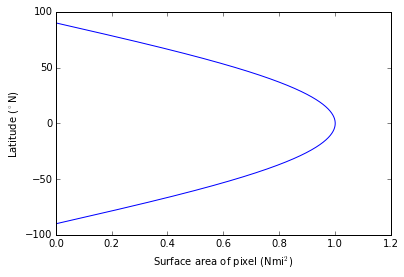

In [91]:
r = 6371 / 1.852  # raidus in km

equator_circ = 2 * np.pi * r
circ_at_lat = equator_circ * np.cos(np.deg2rad(y))

# pixels are 1min in height which is equal to 1NM
area_of_pixel = (equator_circ / 2 / y.size) * (circ_at_lat / x.size)
area_grid = area_of_pixel[:, np.newaxis].repeat(x.size, axis=1)

plt.plot(area_of_pixel, y)
plt.ylabel('Latitude ($^{\circ}$N)')
plt.xlabel('Surface area of pixel (Nmi$^{2}$)')
plt.show()

In [92]:
yi = y < -30
xi = x > -360

lat = y[yi]
lon = x[xi]
topog = z[yi][:, xi]
ocean = topog < 0
land = ~ocean

area = area_grid[yi][:, xi]

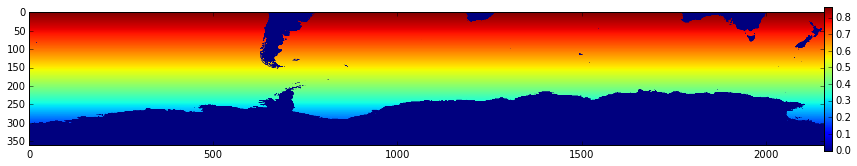

In [93]:
plt.figure(figsize=[13, 2.])
plt.axes([0, 0, 1, 1])
plt.imshow(ocean[::-10, ::10] * area[::-10, ::10])
plt.colorbar(pad=0)
plt.show()

In [97]:
surface_area_southern_ocean_nm = (ocean * area).sum()
surface_area_southern_ocean_km = surface_area_southern_ocean_nm * (1.852**2)
surface_area_southern_ocean_m = surface_area_southern_ocean_km * (1000**2)

print 'AREA OF THE SOUTHERN OCEAN [< -30]'
print '%.4e NM^2' % surface_area_southern_ocean_nm
print '%.4e km^2' % surface_area_southern_ocean_km
print '%.4e m^2' % surface_area_southern_ocean_m

AREA OF THE SOUTHERN OCEAN [< -30]
3.1613e+07 NM^2
1.0843e+08 km^2
1.0843e+14 m^2


In [96]:
SO_CO2flux = 1.0e15  # gC / yr
print SO_CO2flux / surface_area_southern_ocean_m / 365

0.0252670525793
